株式市場　その1

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [7]:
#for stock in tech_list:
#    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
import quandl
for stock in tech_list:
    globals()[stock] = quandl.get('WIKI/{}'.format(stock),start_date=start,end_date=end)

In [9]:
type(AAPL)

pandas.core.frame.DataFrame

In [10]:
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,158.782570,159.926971,157.601324,158.824094,2.847081e+07,0.005040,1.0,158.441350,159.583588,157.262246,158.482674,2.847081e+07
std,11.779533,11.947024,11.688513,11.812792,1.193508e+07,0.056236,0.0,12.137118,12.307888,12.039367,12.168375,1.193508e+07
min,139.300000,139.650000,138.620000,138.990000,1.394898e+07,0.000000,1.0,138.171650,138.518815,137.497158,137.864161,1.394898e+07
25%,148.872500,150.152500,147.307500,148.995000,2.034965e+07,0.000000,1.0,147.921780,149.545726,146.712223,148.392903,2.034965e+07
50%,157.150000,158.130000,155.855000,157.045000,2.505462e+07,0.000000,1.0,157.150000,158.130000,155.739950,156.770000,2.505462e+07
75%,170.475000,171.805000,169.250000,170.592500,3.274206e+07,0.000000,1.0,170.475000,171.805000,169.250000,170.592500,3.274206e+07
max,182.590000,183.500000,180.210000,181.720000,8.543608e+07,0.630000,1.0,182.590000,183.500000,180.210000,181.720000,8.543608e+07


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-03-14 to 2018-03-13
Data columns (total 12 columns):
Open           250 non-null float64
High           250 non-null float64
Low            250 non-null float64
Close          250 non-null float64
Volume         250 non-null float64
Ex-Dividend    250 non-null float64
Split Ratio    250 non-null float64
Adj. Open      250 non-null float64
Adj. High      250 non-null float64
Adj. Low       250 non-null float64
Adj. Close     250 non-null float64
Adj. Volume    250 non-null float64
dtypes: float64(12)
memory usage: 25.4 KB


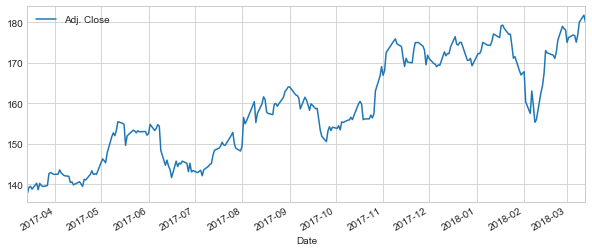

In [12]:
AAPL['Adj. Close'].plot(legend=True,figsize=(10,4))

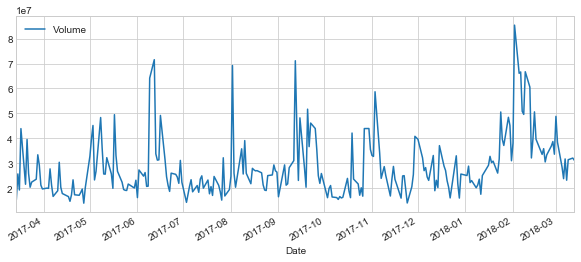

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

移動平均線

株式市場　その2

In [14]:
#ma_day = [10,20,50]

#for ma in ma_day:
#    column_name = "MA {}".format(str(ma))
#    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

In [15]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA {}'.format(ma)
    AAPL[column_name]=AAPL['Adj. Close'].rolling(window=ma,center=False).mean()

In [16]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2017-03-14,139.30,139.6500,138.840,138.99,15309065.0,0.0,1.0,138.171650,138.518815,137.715376,137.864161,15309065.0,NaN,NaN,NaN
2017-03-15,139.41,140.7501,139.025,140.46,25691774.0,0.0,1.0,138.280759,139.610004,137.898878,139.322254,25691774.0,NaN,NaN,NaN
2017-03-16,140.72,141.0200,140.260,140.69,19231998.0,0.0,1.0,139.580148,139.877718,139.123874,139.550391,19231998.0,NaN,NaN,NaN
2017-03-17,141.00,141.0000,139.890,139.99,43884952.0,0.0,1.0,139.857880,139.857880,138.756871,138.856061,43884952.0,NaN,NaN,NaN
2017-03-20,140.40,141.5000,140.230,141.46,21542038.0,0.0,1.0,139.262740,140.353830,139.094117,140.314154,21542038.0,NaN,NaN,NaN


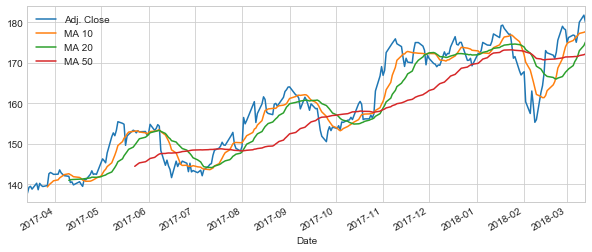

In [17]:
AAPL[['Adj. Close','MA 10','MA 20','MA 50']].plot(subplots=False, figsize=(10,4))

In [18]:
AAPL['Daily Return']=AAPL['Adj. Close'].pct_change()

In [19]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,,,,,,,
2017-03-14,139.30,139.6500,138.840,138.99,15309065.0,0.0,1.0,138.171650,138.518815,137.715376,137.864161,15309065.0,NaN,NaN,NaN,NaN
2017-03-15,139.41,140.7501,139.025,140.46,25691774.0,0.0,1.0,138.280759,139.610004,137.898878,139.322254,25691774.0,NaN,NaN,NaN,0.010576
2017-03-16,140.72,141.0200,140.260,140.69,19231998.0,0.0,1.0,139.580148,139.877718,139.123874,139.550391,19231998.0,NaN,NaN,NaN,0.001637
2017-03-17,141.00,141.0000,139.890,139.99,43884952.0,0.0,1.0,139.857880,139.857880,138.756871,138.856061,43884952.0,NaN,NaN,NaN,-0.004975
2017-03-20,140.40,141.5000,140.230,141.46,21542038.0,0.0,1.0,139.262740,140.353830,139.094117,140.314154,21542038.0,NaN,NaN,NaN,0.010501


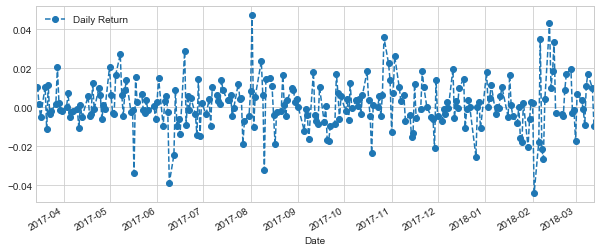

In [20]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

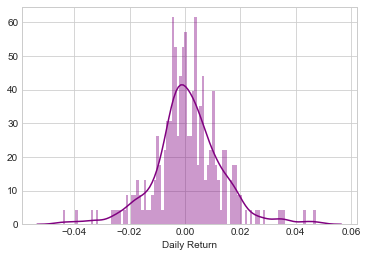

In [21]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

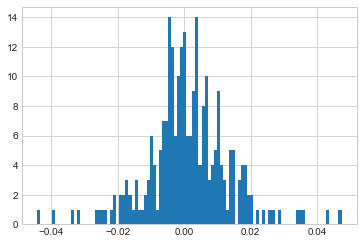

In [22]:
AAPL['Daily Return'].hist(bins=100)

In [23]:
#closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [24]:
AAPL.index

DatetimeIndex(['2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17',
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-27',
               ...
               '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-05',
               '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09',
               '2018-03-12', '2018-03-13'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [25]:
closing_df=DataFrame(index=AAPL.index,columns=tech_list)
closing_df=closing_df.fillna(0)
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-03-14,0,0,0,0
2017-03-15,0,0,0,0
2017-03-16,0,0,0,0
2017-03-17,0,0,0,0
2017-03-20,0,0,0,0


In [26]:
for stock in tech_list:
    closing_df[stock] = quandl.get('WIKI/{}.11'.format(stock),start_date=start,end_date=end)

In [27]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-03-14,137.864161,845.62,63.389921,852.53
2017-03-15,139.322254,847.20,63.724536,852.97
2017-03-16,139.550391,848.78,63.616278,853.42
2017-03-17,138.856061,852.12,63.842635,852.31
2017-03-20,140.314154,848.40,63.901685,856.97


In [28]:
tech_rets=closing_df.pct_change()

In [29]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-03-14,NaN,NaN,NaN,NaN
2017-03-15,0.010576,0.001868,0.005279,0.000516
2017-03-16,0.001637,0.001865,-0.001699,0.000528
2017-03-17,-0.004975,0.003935,0.003558,-0.001301
2017-03-20,0.010501,-0.004366,0.000925,0.005467


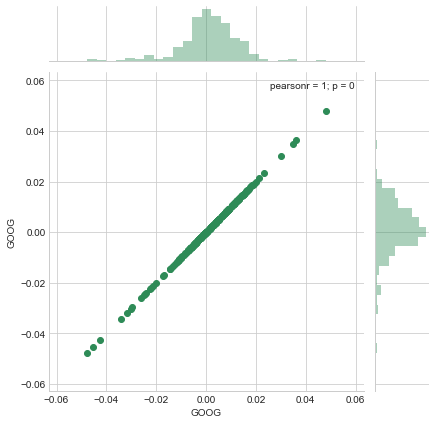

In [30]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

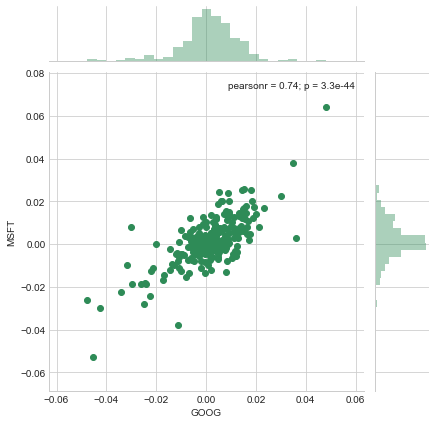

In [31]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

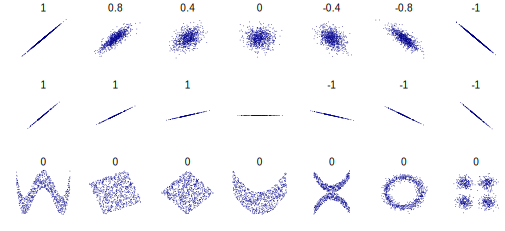

In [32]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

株式市場　その3

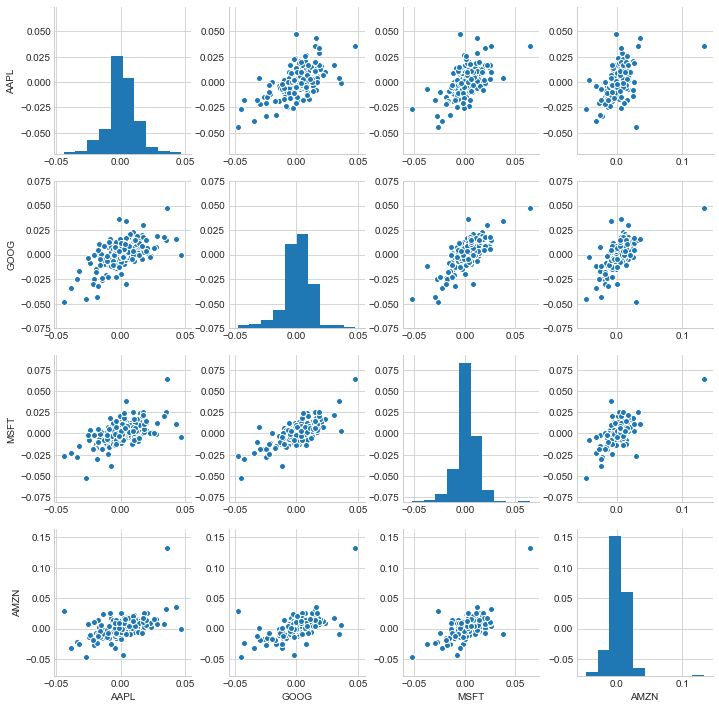

In [33]:
sns.pairplot(tech_rets.dropna())

In [34]:
# returns_fig=sns.PairGrid(tech_rets.dropna())
# returns_fig.map_upper(plt.scatter,color='purple')
# returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
# returns_fig.map_diag(plt.hist,bins=30)

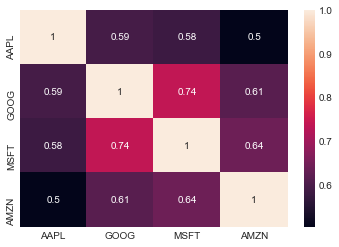

In [35]:
sns.heatmap(tech_rets.corr(),annot=True)

株式市場　その4

In [36]:
rets=tech_rets.dropna()

In [37]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-03-15,0.010576,0.001868,0.005279,0.000516
2017-03-16,0.001637,0.001865,-0.001699,0.000528
2017-03-17,-0.004975,0.003935,0.003558,-0.001301
2017-03-20,0.010501,-0.004366,0.000925,0.005467
2017-03-21,-0.011452,-0.021146,-0.011089,-0.016068


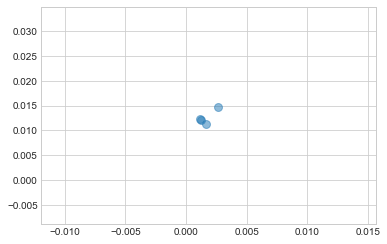

In [38]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=np.pi*20)

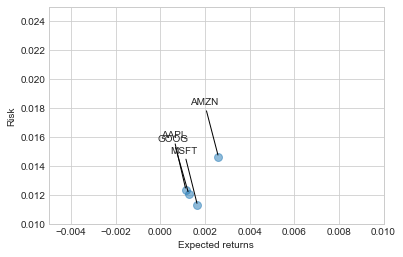

In [44]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=np.pi*20)
plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(0,50),
                 textcoords='offset points',ha='right',va='bottom',
                 arrowprops=dict(arrowstyle='-',connectionstyle='arc3'))

株式市場　その5